<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Final_Exam_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Email : adittysonjoy@gmail.com

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv('/content/final-employee-ds.csv')
df

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,196,Employee_96,58,Female,Marketing,9,67350.0,47,65,2021-06-20,S,9,25,2
96,197,Employee_97,56,Male,IT,12,133008.0,45,77,2011-11-03,XL,5,12,2
97,198,Employee_98,43,Female,Management,1,134297.0,45,64,2015-05-24,M,3,39,3
98,199,Employee_99,48,Male,Marketing,1,65351.0,36,84,2021-05-19,L,5,17,2


**Ans** to the Q : 1

In [ ]:
convert_trhours=df['TrainingHours']
convert_trhours.to_numpy() # convert to numpy
convert_trhours=convert_trhours.astype(float) # convert to float
# Find mean :
mean_hour=np.mean(convert_trhours)
print(f"mean_value : {mean_hour}")

# Find standard deviation :
std_hour=np.std(convert_trhours)
print(f"std_value : {std_hour}")

mean_value : 24.19
std_value : 13.842467265628628


# Ans to Q 2 :

In [ ]:
#df['Salary']=df.groupby('Department')['Salary'].apply(lambda x: x.fillna(x.median()))
#df['Salary'].median()
df['Salary']=df.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.median()))
#filter_salary = df[(df['ExperienceYears']>12) | (df['ProjectCount']>5)]
filter_salary = df[(df['ExperienceYears']>12) & (df['ProjectCount']>5)]
sum_salary = filter_salary['Salary'].sum()
#print(sum_salary)
print(f"Total Salary : {sum_salary}")

Total Salary : 1985775.5


## #Ans to Q 3 :

In [ ]:
#df1 = df[(df['Department']=='IT') | (df['Department']=='Finance')]
#df1 = df1[df1['Age'].between(30,40)]
#df1 = df1[df1['PerformanceScore']>80]
#simplify :
df1= df[((df['Department']=='IT')| (df['Department']=='Finance')) & (df['Age'].between(30,40)) &
        (df['PerformanceScore']>80)]
srt = df1.sort_values(by='Salary',ascending=False)
print(display(srt[['Name','Department','Salary','PerformanceScore']]))

,Name,Department,Salary,PerformanceScore
79,Employee_80,IT,143691.0,85
65,Employee_66,IT,131007.0,82
88,Employee_89,Finance,126027.0,92
4,Employee_5,Finance,85543.0,97
32,Employee_33,IT,83919.0,98
55,Employee_56,Finance,49540.0,94


None


# Ans to Q 4 :

In [ ]:
df['SalaryPerHour'] = df['Salary'] / df['WorkHoursPerWeek'] * 4
dh5=df.sort_values(by='SalaryPerHour',ascending=False).head(5)
#df['SalaryPerHour',column='Name','SalaryPerHour']
#df['SalaryPerHour'].head(5)
#print(df[['Name','SalaryPerHour']].head(5))
print(display(dh5[['Name','SalaryPerHour']]))

,Name,SalaryPerHour
46,Employee_47,15700.457143
27,Employee_28,15540.685714
31,Employee_32,15478.285714
79,Employee_80,15125.368421
80,Employee_81,15005.743590


None


# Ans to Q 5 :

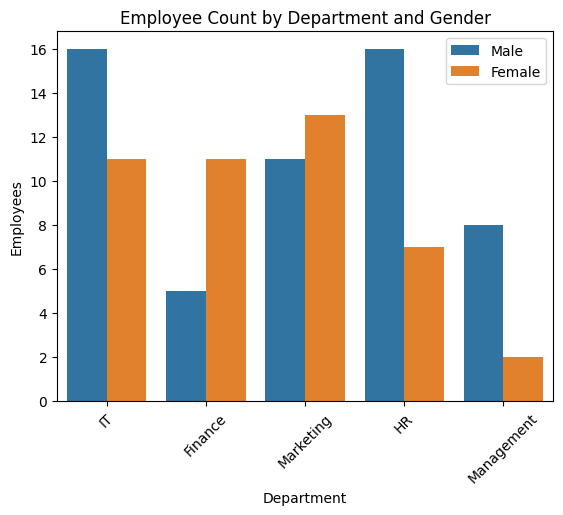

In [ ]:
sns.countplot(data=df,x='Department',hue='Gender')
plt.xlabel('Department')
plt.ylabel('Employees')
plt.xticks(rotation=45)
plt.title('Employee Count by Department and Gender')
plt.legend()
plt.show()
#fig=ax.bar(df,x='Department',y='EmployeeID')
#fig.show()
#sns.countplot(data=df, x='Department',y='EmployeeID',errorbar=None)